In [1]:
import pandas as pd

In [2]:
import os

In [4]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '628pre1.pdf',
 '628_module2.pptx',
 '628_module2.zip',
 'code',
 'README.md',
 'unsorted_corpus.csv',
 'Untitled.ipynb',
 'vis',
 'vis.zip',
 '__MACOSX']

In [5]:
data=pd.read_csv('unsorted_corpus.csv')

C:\Users\lyj_i\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497

In [6]:
data50=data[data['stars']>=4]

In [7]:
del data

In [8]:
data50.shape

(203671, 534)

corpus = []
for i in range(20000):
    print(i)
    temp = []
    for k in range(2,534):
        if not data50.iloc[i].notnull()[k]:
            break
        elif data50.iloc[i].notnull()[k]:
            temp.append(data50.iloc[i][k])
    corpus.append(temp)


In [23]:
print(corpus[10])

['order', 'akropolis', 'pizza', 'pork', 'gyro', 'first', 'thing', 'notice', 'pizza', 'come', 'vibrant', 'topping', 'tell', 'veggie', 'fresh', 'look', 'gyro', 'one', 'best', 'fry', 'awesome', 'great', 'service', 'care', 'give', 'good', 'experience', 'definitely', 'back']


In [13]:
import copy

In [27]:
test=copy.deepcopy(corpus)

In [28]:
test=test[0:18000]

In [29]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(test)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in test]


In [33]:
lda100=gensim.models.ldamodel.LdaModel

In [36]:
from gensim.models import CoherenceModel

In [39]:
for i in range(5,11):
    print(i)
    ldamodel = lda100(doc_term_matrix, num_topics=i,alpha='auto', id2word = dictionary, passes=50)
    print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))
    
    coherence = CoherenceModel(model=ldamodel, texts=test, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence.get_coherence()
    print('\nCoherence Score: ', coherence_lda)

5

Perplexity:  -7.264517191165339

Coherence Score:  0.41852372224257267
6

Perplexity:  -7.273704032383012

Coherence Score:  0.42530514383919954
7

Perplexity:  -7.326128160769369

Coherence Score:  0.4779781441032133
8

Perplexity:  -7.382359588132781

Coherence Score:  0.45166976377060786
9

Perplexity:  -7.459893423926418

Coherence Score:  0.3998105176268602
10

Perplexity:  -7.571014095755964

Coherence Score:  0.46225379667378197


In [41]:
# when set topic to 10, we can get the minimum perplexity
ldamodel = lda100(doc_term_matrix, num_topics=7,alpha='auto', id2word = dictionary, passes=50)

In [63]:
print(ldamodel.print_topics(num_topics=7, num_words=20))

[(0, '0.065*"pizza" + 0.023*"not" + 0.020*"order" + 0.015*"get" + 0.013*"good" + 0.012*"like" + 0.011*"place" + 0.009*"crust" + 0.008*"one" + 0.008*"try" + 0.008*"cheese" + 0.008*"make" + 0.007*"go" + 0.007*"sauce" + 0.006*"fresh" + 0.006*"time" + 0.006*"eat" + 0.005*"taste" + 0.005*"say" + 0.005*"best"'), (1, '0.053*"sandwich" + 0.029*"wolfgang" + 0.023*"puck" + 0.018*"york" + 0.017*"vega" + 0.017*"mgm" + 0.016*"deli" + 0.016*"new" + 0.014*"pastrami" + 0.012*"beef" + 0.011*"casino" + 0.009*"corn" + 0.009*"turkey" + 0.007*"grand" + 0.007*"greenberg" + 0.006*"chip" + 0.006*"potato" + 0.006*"meat" + 0.006*"hob" + 0.005*"soup"'), (2, '0.011*"de" + 0.011*"il" + 0.011*"bosco" + 0.009*"le" + 0.006*"la" + 0.006*"tempe" + 0.005*"et" + 0.005*"screen" + 0.004*"truck" + 0.004*"mill" + 0.003*"prairie" + 0.003*"calgary" + 0.003*"bank" + 0.003*"un" + 0.003*"est" + 0.003*"pour" + 0.003*"biaggia" + 0.003*"player" + 0.003*"du" + 0.003*"shawarma"'), (3, '0.016*"beer" + 0.011*"menu" + 0.010*"egg" + 0.010

In [69]:
coh=[0.41852372224257267,0.42530514383919954,0.4779781441032133,0.45166976377060786,0.3998105176268602,0.46225379667378197]
per=[-7.264517191165339,-7.273704032383012,-7.326128160769369,-7.382359588132781,-7.459893423926418,-7.571014095755964]
per = [float(i)/max(per) for i in per]
N_topics=[5,6,7,8,9,10]

In [66]:
per

[1.0,
 1.0012646182775706,
 1.008481082497672,
 1.0162216419710253,
 1.0268945929398698,
 1.0421909531666285]

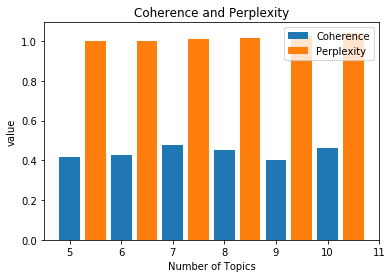

In [71]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.bar(N_topics, coh, width=.4,label='Coherence')
plt.bar([5.5,6.5,7.5,8.5,9.5,10.5],per, width=.4,label='Perplexity')

plt.legend()
plt.xlabel('Number of Topics')
plt.ylabel('value')
plt.title('Coherence and Perplexity')
plt.show()


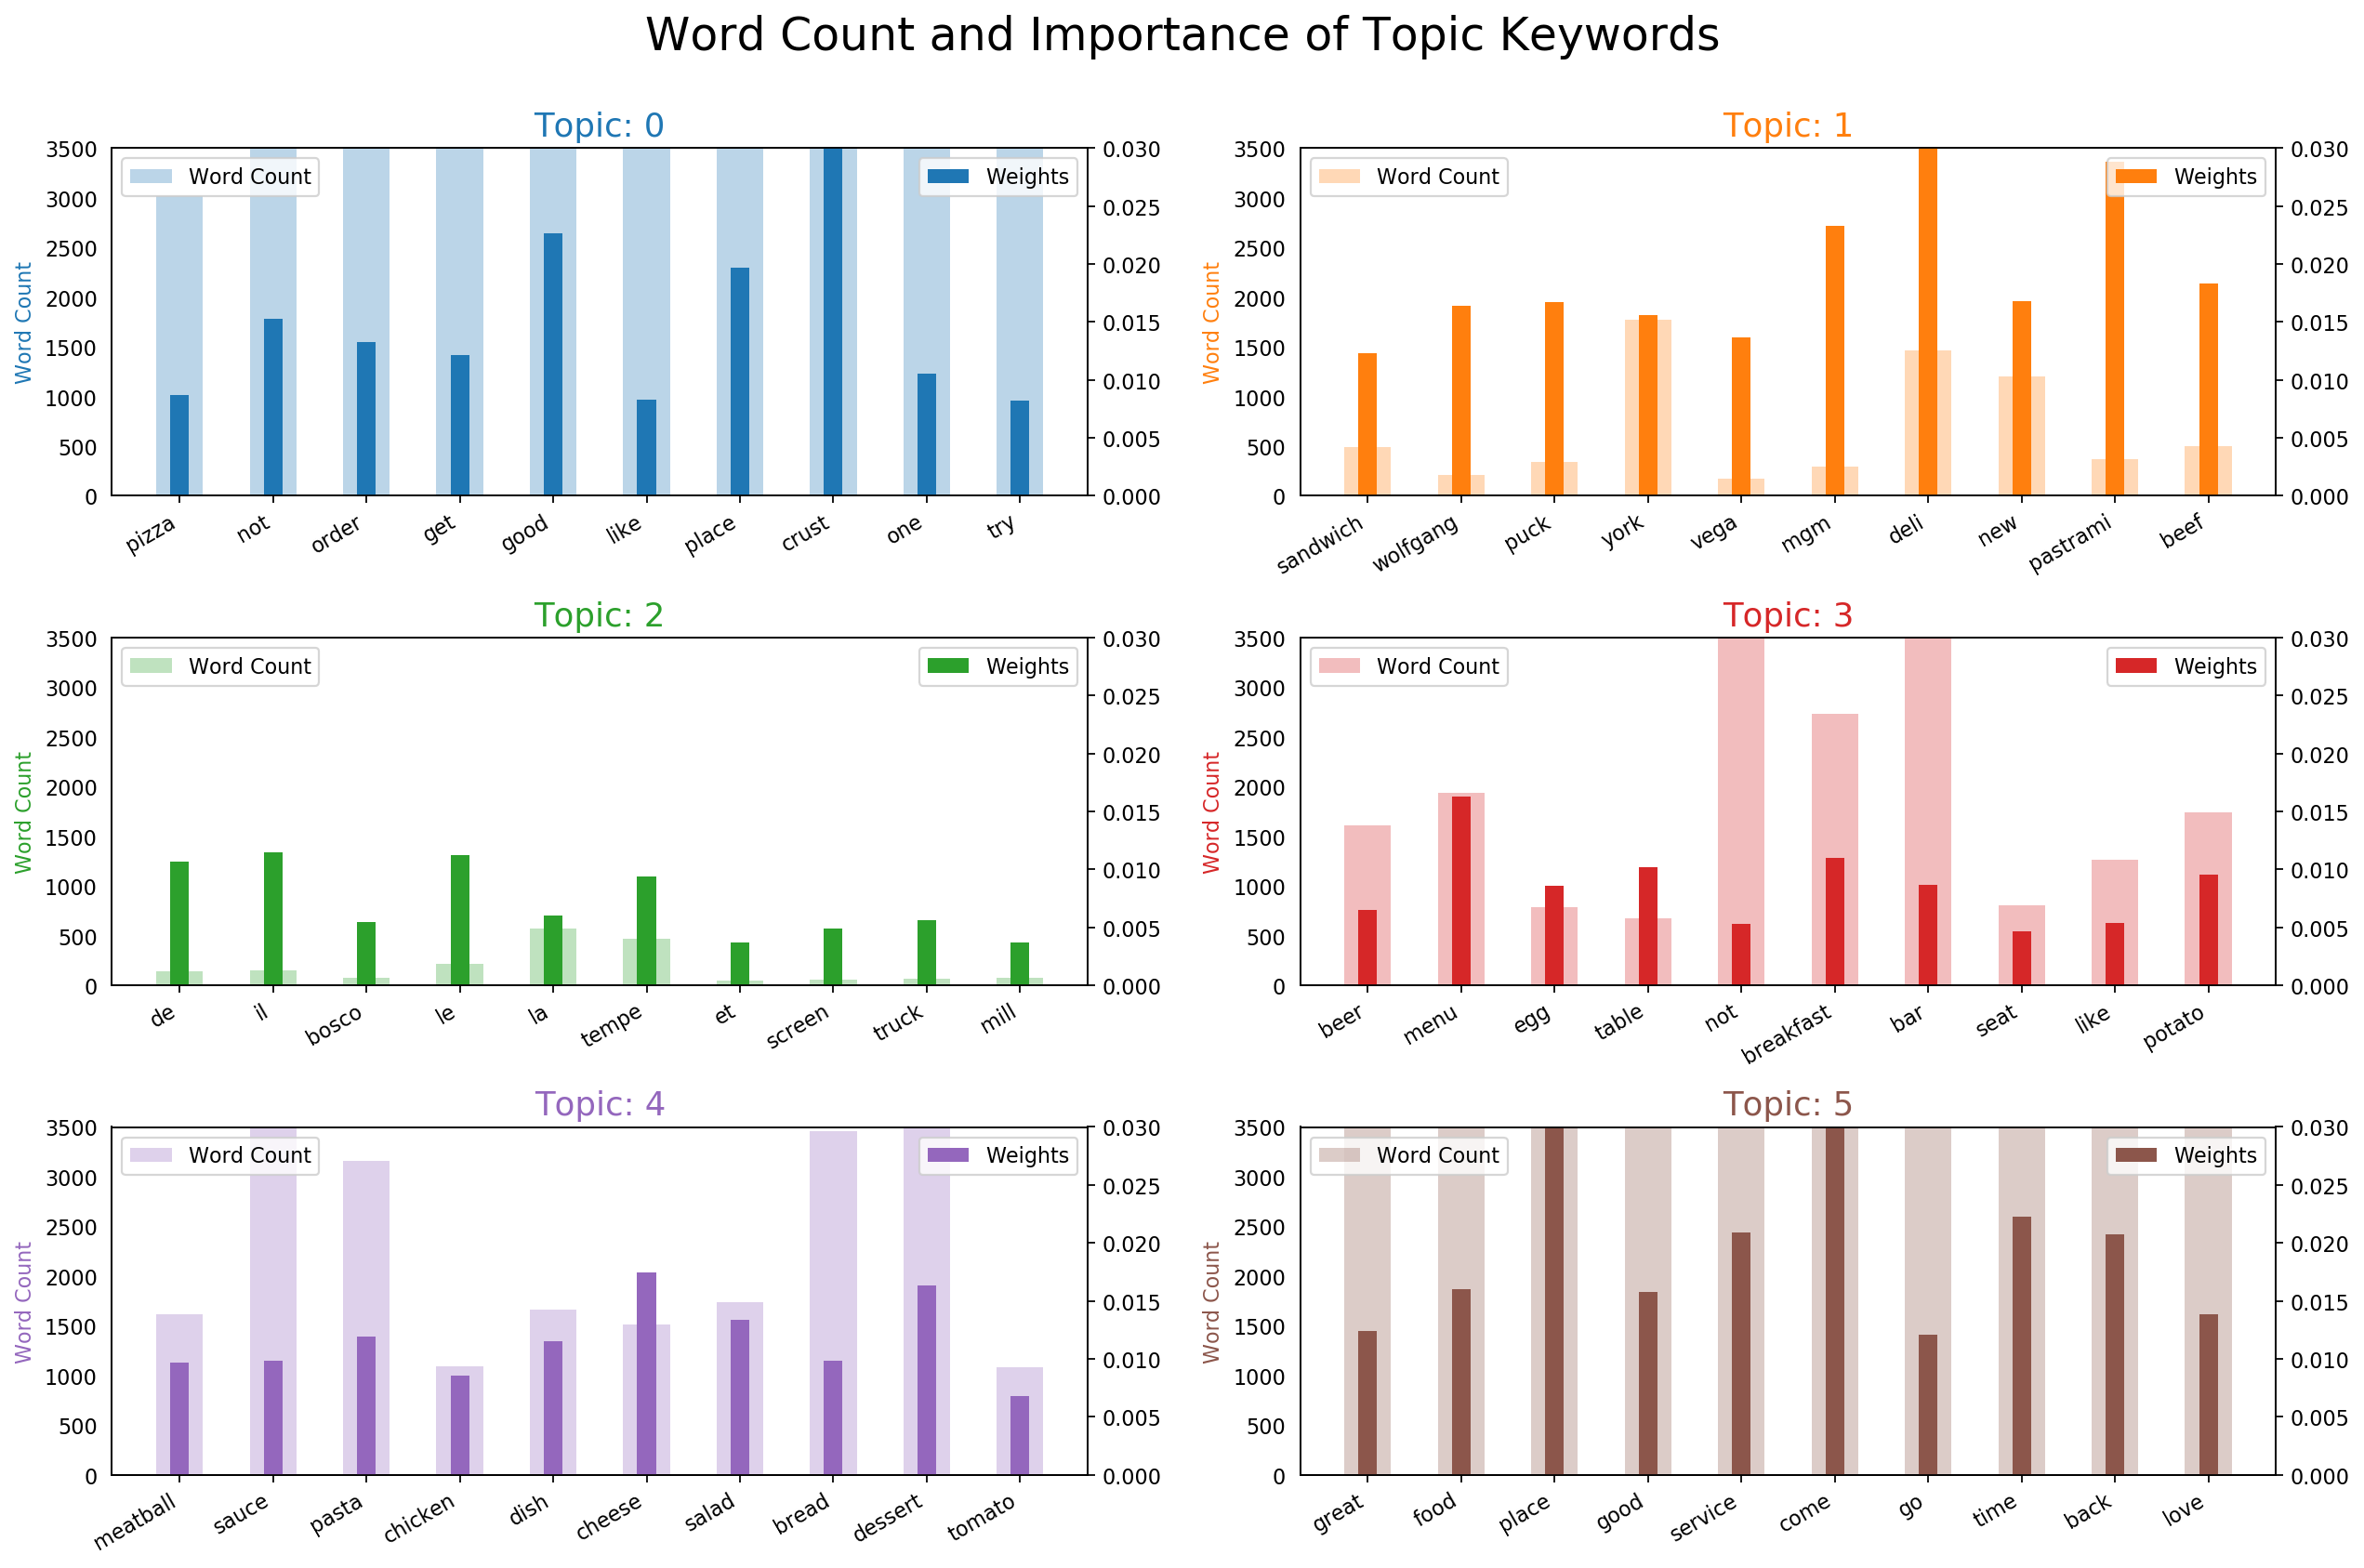

In [73]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in test for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

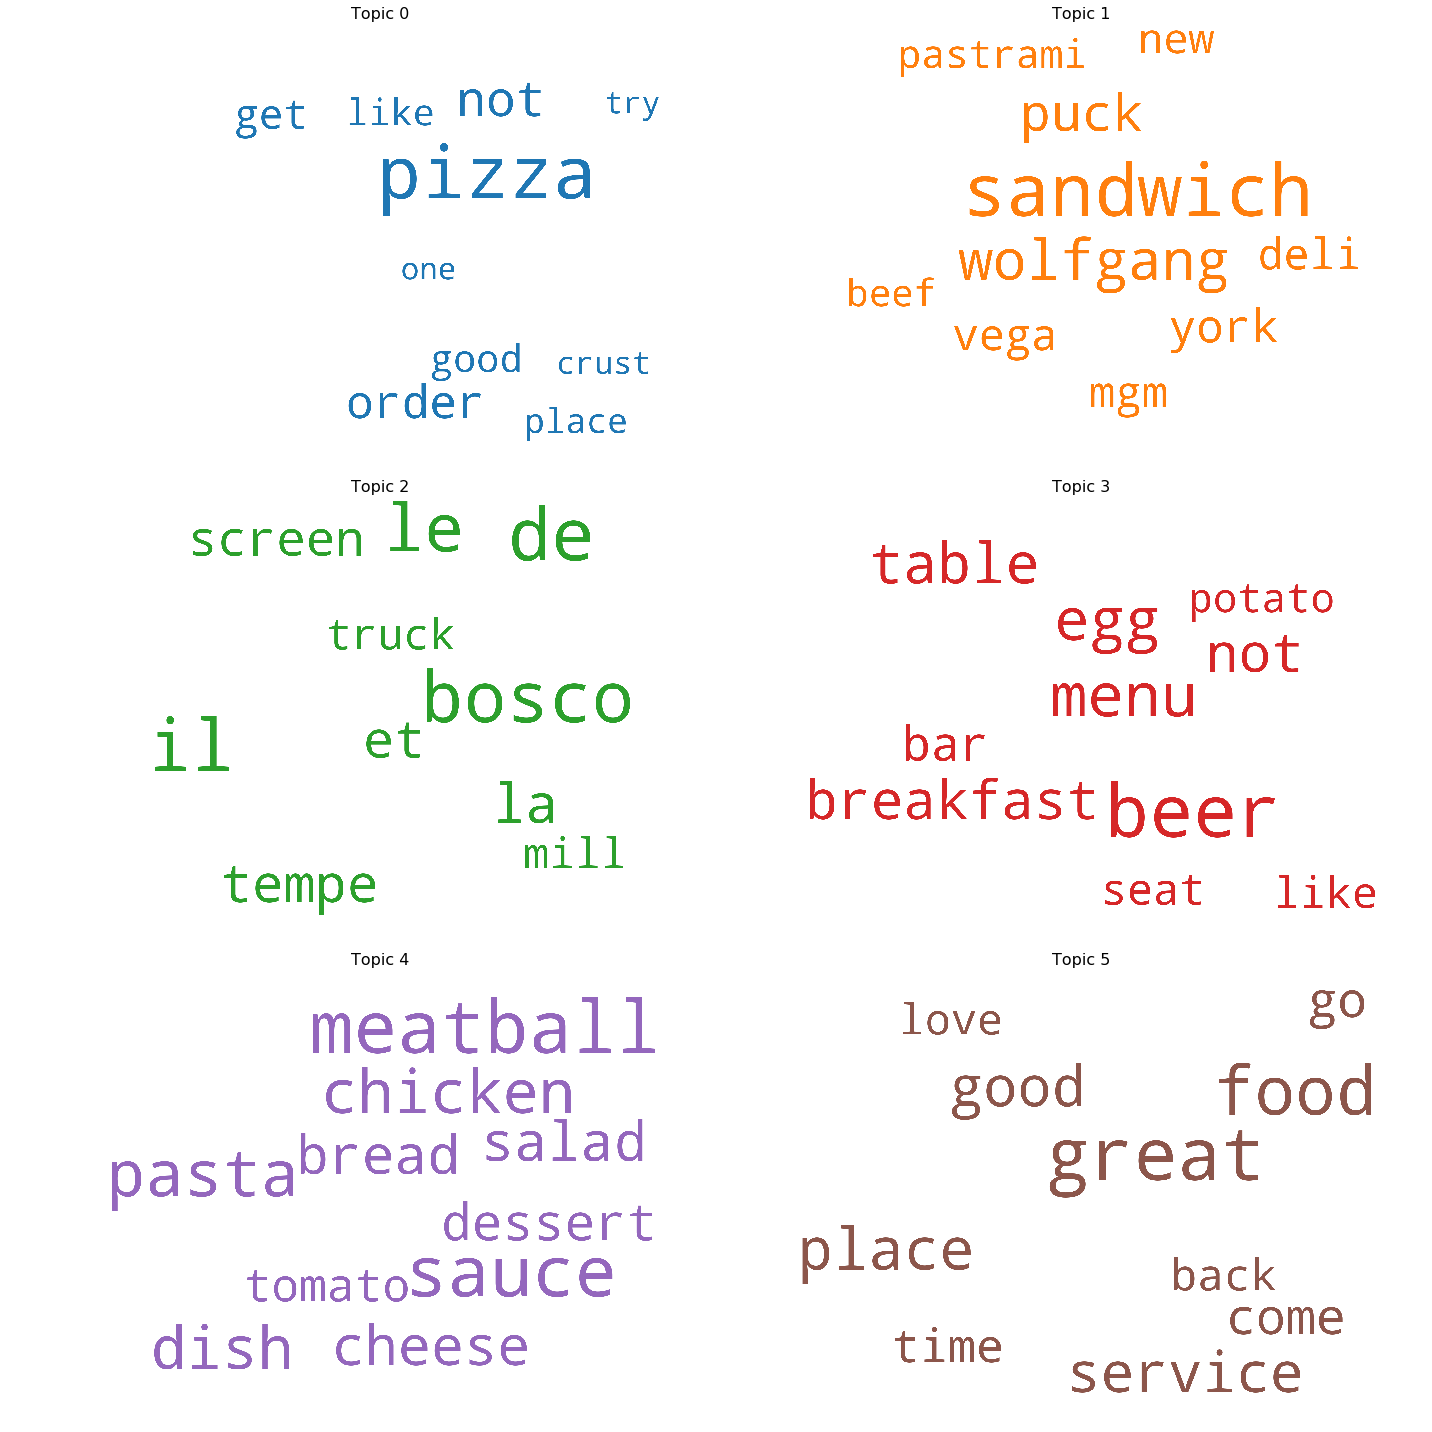

In [77]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()